**Nome:** Iran Freitas Ribeiro

**Matrícula:** 2021241588

**Disciplina:** TEI - Estatística Aplicada

**Professor:** Celso José Munaro

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, norm
import statsmodels.api as sm
from statsmodels.tsa.stattools import ccf, OLS
plt.style.use('seaborn')

In [2]:
Z = pd.read_csv("epc9dat.txt", sep=" ", header=None)
Z = Z[[3,6]].rename(columns={3:'y',6:'x'})
Z.head()

,y,x
0,24.615091,344.47342
1,24.615091,344.76187
2,24.615091,344.66571
3,24.602808,344.40930
4,24.602808,344.56952


# Questão 1

**1.1**

In [ ]:
fig, ax = plt.subplots(figsize=(12,4), ncols=2)
Z[['x','y']].plot(ax=ax[0])
Z.plot(kind='scatter',x='x',y='y', ax=ax[1])
ax[0].set_title("Gráfico x, y")
ax[1].set_title("Gráfico de dispersão (x,y)")
plt.suptitle("Figura 1 - Gráficos das variáveis x e y");

A Figura $1$, no gráfico de x,y (à esquerda) mostra que, se analisadas separadamente, as variáveis $x$ e $y$ são muito diferentes: os valores da variável $x$ são muito maiores que os da variável $y$ e, visualmente, $x$ varia mais que $y$ ao longo das amostras.

No gráfico da direita, entretanto, o gráfico da dispersão entre $x$ e $y$ indica que pode haver uma correlação positiva entre as duas variáveis, pois para maiores valores de $x$ temos também maiores valores de $y$. Visualmente, podemos verificar a existência de uma "reta" na diagonal do gráfico.

**1.2**

In [ ]:
c1,pvalue = pearsonr(Z['x'],Z['y'])
c1, pvalue

Usando a totalidade dos dados a correlação entre $x$ e $y$ é $0.993$, um valor muito próximo de $1$, com um $P-$ value $=0.0$ < $0.05$, ou seja, as variáveis possuem uma correlação significativamente diferente de $0$.

In [ ]:
Z_500 = Z.sample(500)
c2,pvalue = pearsonr(Z_500['x'],Z_500['y'])
c2, pvalue, c1-c2

Usando $500$ pares $(x,y)$ selecionados aleatoriamente, temos uma correlação de $\approx 0.992$, apenas cerca de $1$ milésimo de diferença entre uma correlação em outra. Além disso, o $P-$ value ainda é $0$, indicando que a correlação entre as duas variáveis ainda é significativamente diferente de $0$.

# Questão 2

**2.1**

In [ ]:
crus_corr = ccf(Z['x'],Z['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 2 - Correlação cruzada entre $x$ e $y$");

**2.2**

In [ ]:
Z_500 = Z.sample(500)
crus_corr = ccf(Z_500['x'],Z_500['y'], adjusted=False)
fig, ax = plt.subplots()
ax.plot(crus_corr)
ax.set_ylabel("Correlação cruzada")
ax.set_xlabel("Atrasos")
plt.title("Figura 3 - Correlação cruzada entre 500 pares aleatórios $x$ e $y$");

Nota-se, na Figura $2$, que há uma correlação positiva forte para atrasos maiores que $0$, indicando que há uma dependência temporal nos dados. Em outras palavras, conseguimos prever valores futuros a partir de valores passados. Na Figura $3$, entretanto, percebemos que a autocorrelação só ocorre com atrasos iguais a $0$. Isso é justificado pelo fato de cada um dos 500 valores ser selecionado aleatoriamente, fazendo com que a dependência temporal entre os valores deixe de existir.

Em relação a metodologia utilizada para obtenção, esses res

# Questão 3

**3.1**

In [ ]:
# seleciono 100 amostras
# random_state é usado para fins de reprodutibilidade
Z_100 = Z.sample(100, random_state=42, replace=False)
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(Z_100['x'], Z_100['y'])
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title(("Figura 4 - Visualização de 100 amostras selecionadas aleatoriamente"));

O código a seguir calcula a $\beta_0$ e $\beta_1$ para os valores de $x$ e $y$ selecionados. 

OBS: se o objetivo for obter apenas $\beta_0$ e $\beta_1$, podemos fazer o produto escalar de $y$ pela pseudo-inversa de $x$. Outros resultados podem ser obtidos com a biblioteca [OLS](https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html).

In [ ]:
Z_100

In [43]:
betas_0 = []
betas_1 = []
# percorre todos pares
ones = np.ones(100)
seeds = np.arange(50, 150)
for i in range(100):
    Z_100 = Z.sample(100, random_state=seeds[i])
    x = Z_100['x'].values
    y = Z_100['y'].values
    A = np.vstack([x, ones]).T
    pinv = np.linalg.pinv(A) # pseudo-inversa
    b1, b0 = pinv.dot(y) # produto escalar
    betas_0.append(b0)
    betas_1.append(b1)    

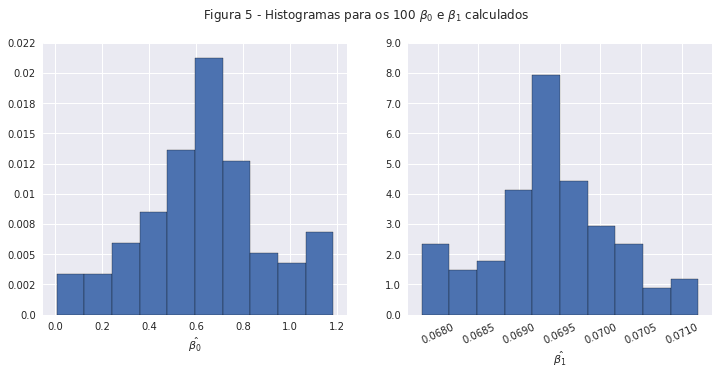

In [12]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2)
ax[0].hist(betas_0, density=True, edgecolor='black')
locs_0 = ax[0].get_yticks()
ax[0].set_yticks(locs_0,np.round(locs_0/len(betas_0), 3))
ax[0].set_xlabel(r'$\hat{\beta_0}$')

ax[1].hist(betas_1, density=True, edgecolor='black')
locs_1 = ax[1].get_yticks()
ax[1].set_yticks(locs_1,np.round(locs_1/len(betas_1),3))
ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r"Figura 5 - Histogramas para os 100 $\beta_0$ e $\beta_1$ calculados")
plt.xticks(rotation=25);

**3.2**

Para o cálculo da média e desvio padrão usamos o $\beta_0$ e $\beta_1$ obtidos da regressão dos dados.

In [5]:
np.mean(betas_0)

0.6136014853117103

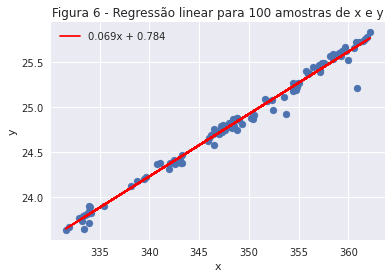

In [6]:
X = Z_100['x'].values
Y = Z_100['y'].values
A = np.vstack([X, np.ones(len(X))]).T
pinv = np.linalg.pinv(A)
b1, b0 = pinv.dot(Y)
y_hat = [(b0 + b1*xi) for xi in X]
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(X, Y)
ax.plot(X, y_hat, c='r', label='{:.3f}x + {:.3f}'.format(b1, b0))
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title("Figura 6 - Regressão linear para 100 amostras de x e y")
plt.legend();

Considerando a lista ``betas_1`` anterior:

A média de $\beta_1$ = $E(\beta_1)$

A variância de $\hat{\beta_1}$ = $E(\beta_1 - E(\beta_1))^2$

As funções a seguir implementam as duas equações acima

In [44]:
def expected_value(values, probs):
    values = np.asarray(values)
    probs = np.asarray(probs)
    return (values * probs).sum() / probs.sum()

def expected_var(X):
    # expX = expected_value(X, probs)
    # print (expX)
    # x_ = np.array(X) - expX
    # probsx = [norm.pdf(xi, loc=mu, scale=std) for xi in x_]
    return np.cov(X)+0

In [28]:
cov = np.cov(np.array(betas_1))

In [ ]:
betas_1_2 = [bi**2 for bi in betas_1]

In [45]:
probsb1 = [norm.pdf(bi, loc=np.mean(betas_1), scale=np.std(betas_1)) for bi in betas_1]
media_b1 = expected_value(betas_1, probsb1)
var_b1 = expected_var(betas_1)
media_b1, var_b1

(0.0694082469826928, 5.748466873785923e-07)

Assim, média de $\beta_1 \approx 0.59$ e variância de $\beta_1 \approx 0.14$

De forma similar, para $\beta_0$

In [37]:
probsb0 = [norm.pdf(bi, loc=np.mean(betas_0), scale=np.std(betas_0)) for bi in betas_0]
media_b0 = expected_value(betas_0, probsb0)
var_b0 = expected_var(betas_0, probsb0, np.mean(probsb0), np.std(probsb0))
media_b0, var_b0

(0.6263151925729498, 0.06870837885254706)

Média de $\beta_0=0.07$ e variância de $\beta_0 \approx 3e-09$

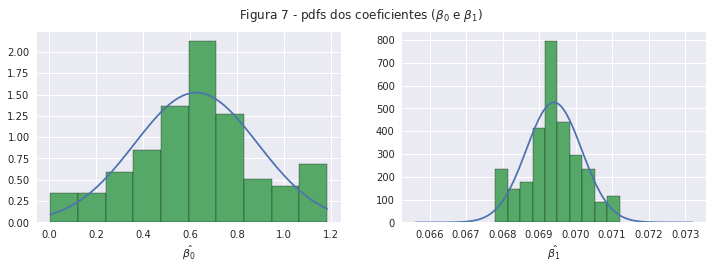

In [38]:
# pdf de b1
X_b1 = np.linspace(media_b1-5*np.sqrt(var_b1), media_b1+5*np.sqrt(var_b1), 100)
pdf_b1 = [norm.pdf(xi, loc=media_b1, scale=np.sqrt(var_b1)) for xi in X_b1]
# pdf de b0
X_b0 = np.linspace(np.min(betas_0), np.max(betas_0), 100)
pdf_b0 = [norm.pdf(xi, loc=media_b0, scale=np.sqrt(var_b0)) for xi in X_b0]
fig, ax = plt.subplots(figsize=(12, 3.5), ncols=2)
ax[0].plot(X_b0, pdf_b0)
ax[0].hist(betas_0,  density=True, edgecolor='black')

ax[1].plot(X_b1, pdf_b1)
ax[1].hist(betas_1, density=True, edgecolor='black')

ax[0].set_xlabel(r'$\hat{\beta_0}$')
ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r'Figura 7 - pdfs dos coeficientes ($\beta_0$ e $\beta_1$)')
plt.show();

A Figura $7$ mostra a pdf de $\beta_0$ e $\beta_1$, obtidas a partir das equações disponibilizadas, sobre seus respectivos histogramamas. Nota-se que $\beta_0$ possui média $\approx 0.0693$ e uma variância de $\approx 3e^{-9}$. Como mostra a figura (à esquerda), quase todos os valores da pdf de $\beta_0$ acabam ficando muito próximos da média, já que a variância é praticamente 0.

$\beta_1$, por outro lado, possui média $0.64$ e variância $0.14$. Nota-se, na figura à direita, que  a pdf se aproxima bastante do histograma da variável, e ambos tem uma distribuição aproximadamente normal.

# Questão 4

**4.1**

In [71]:
# seleciono outras 100 amostras
betas_0 = []
betas_1 = []
for i in range(100):
    Z_100_4 = Z.sample(100,)
    Z_100_4.sort_index(inplace=True)
    # A biblioteca Ordinary Least Squares (OLS) retorna diversos resultados, entre eles o IC
    X_4, Y_4 = Z_100_4['x'], Z_100_4['y']
    A = np.vstack([X_4, np.ones(len(X_4))]).T
    mod = OLS(Y_4, A)
    # x1=b1, const=b0
    res = mod.fit()
    b1 = res.params.loc['x1']
    b0 = res.params.loc['const']
    betas_1.append(b1)
    betas_0.append(b0)    

In [72]:
b1

0.06934439409196888

In [73]:
def CI(muX, sigma, n, alpha=0.05):
    """
    Calcula o intervalo de confiância de uma distribuição normal
    """
    zalpha_2  = norm.ppf(alpha/2)    
    ci_d = muX - zalpha_2*sigma/np.sqrt(n) # limite superior    
    ci_l = muX + zalpha_2*sigma/np.sqrt(n) # limite inferior
    return ci_l, ci_d

In [74]:
var_b1 = expected_var(betas_1)
var_b0 = expected_var(betas_0)
ci_b1 = CI(np.mean(betas_1), np.sqrt(var_b1), n=100,alpha=0.05)
ci_b0 = CI(np.mean(betas_0), np.sqrt(var_b0), n=100,alpha=0.05)
print (ci_b1)
print (ci_b0)

(0.06914393544888008, 0.06949792985333332)
(0.593447323627922, 0.7154332939394522)


In [59]:
var_b0

0.09041686716947708

In [76]:
z1_b1 = (ci_b1[0] - 0)/np.sqrt(var_b1)
z2_b1 = (ci_b1[1] - 0)/np.sqrt(var_b1)

In [78]:
1 - norm.cdf(z1_b1)

0.0

In [67]:
df_IC = res.conf_int(0.05)
df_IC

,0,1
x1,0.067772,0.070561
const,0.224968,1.192161


In [ ]:
ci_b1 = df_IC.loc['x1'].values
ci_b0 = df_IC.loc['const'].values

In [56]:
probsb1 = [norm.pdf(bi, loc=np.mean(betas_1), scale=np.std(betas_1)) for bi in betas_1]
mub1, var_b1 = expected_value(betas_1, probsb1), expected_var(betas_1)

X_b1 = np.linspace(mub1-5*np.sqrt(var_b1), mub1+5*np.sqrt(var_b1), 100)
pdf_b1 = [norm.pdf(xi, loc=mub1, scale=np.sqrt(var_b1)) for xi in X_b1]

probsb0 = [norm.pdf(bi, loc=np.mean(betas_0), scale=np.std(betas_0)) for bi in betas_0]
mub0, var_b0 = expected_value(betas_0, probsb0), expected_var(betas_0)

X_b0 = np.linspace(mub0-5*np.sqrt(var_b0), mub0+5*np.sqrt(var_b0), 100)
pdf_b0 = [norm.pdf(xi, loc=mub0, scale=np.sqrt(var_b0)) for xi in X_b0]

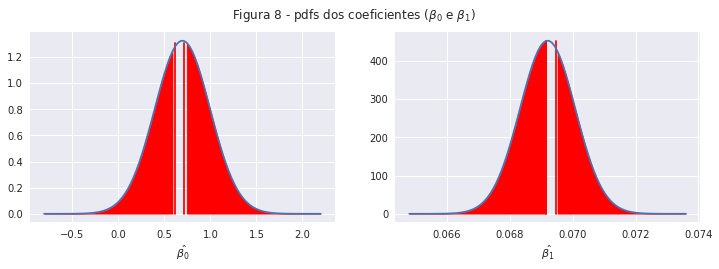

In [69]:
fig, ax = plt.subplots(figsize=(12, 3.5), ncols=2)
li_b0, ls_b0 = np.min(pdf_b0), np.max(pdf_b0)
li_b1, ls_b1 = np.min(pdf_b1), np.max(pdf_b1)

o_xb0, o_yb0 = [ci_b0[0], ci_b0[0]], [li_b0, ls_b0-0.02]
t_xb0, t_yb0 = [ci_b0[1], ci_b0[1]], [li_b0, ls_b0-0.02]
ax[0].plot(o_xb0, o_yb0, t_xb0, t_yb0, color='red')
ax[0].plot(X_b0, pdf_b0)
ax[0].set_xlabel(r'$\hat{\beta_0}$')
ax[0].fill_between(X_b0, pdf_b0, where=(X_b0>ci_b0[1]), color='red')
ax[0].fill_between(X_b0, pdf_b0, where=(X_b0<ci_b0[0]), color='red')

o_xb1, o_yb1 = [ci_b1[0], ci_b1[0]], [li_b1, ls_b1-0.02]
t_xb1, t_yb1 = [ci_b1[1], ci_b1[1]], [li_b1, ls_b1-0.02]
ax[1].plot(o_xb1, o_yb1, t_xb1, t_yb1, color='red')
ax[1].plot(X_b1, pdf_b1)
ax[1].fill_between(X_b1, pdf_b1, where=(X_b1>ci_b1[1]), color='red')
ax[1].fill_between(X_b1, pdf_b1, where=(X_b1<ci_b1[0]), color='red')

ax[1].set_xlabel(r'$\hat{\beta_1}$')
plt.suptitle(r'Figura 8 - pdfs dos coeficientes ($\beta_0$ e $\beta_1$)');

In [ ]:
ci_b0

In [ ]:
ci_b1

A Figura $8$ mostra os intervalos de confiança (IC) para $\beta_0$ (esquerda) e $\beta_1$ (direita). Nota-se que para o $\beta_0$, o IC é $[-0.06, 0.97]$. Quando comparado com o pdf correspondente ao $\beta_0$ vemos que apenas o lado direito da distribuição possui valores na região crítica do IC (valores de $\beta_0>0.97$).

De forma similar, o IC do $\beta_1$ é $[0.06, 0.07]$, e apenas o lado esquerdo da distribuição possui valores na região crítica do IC (valores de $\beta_1<0.07$)

**4.2**

O código a seguir gera uma sumarização de diversas informações sobre o modelo de regressão.

In [ ]:
res.summary()

Para concluir se o modelo é bom, podemos utilizar o $R^2$, teste de hipótese de $\beta_1$ ($t$) e o $P$-valor, da tabela de sumarização anterior:

- $R^2 = 0.98$ (muito próximo de $1.0$)
- $t = 92.15$ (teste estatístico hipótese alto, bem maior que $0$, rejeita a hipótese nula de que $\beta_1 = 0$)
- $P$-valor $=0.000$ (igual a $0$, reforçando que a hipótese nula deve ser rejeitada)

# Questão 5

In [ ]:
# geração das variáveis aleatórias
np.random.seed(42) # para fins de reprodutibilidade
X_5 = np.random.normal(loc=0, scale=1, size=50)
Y_5 = np.random.normal(loc=0, scale=1, size=50)
plt.scatter(X_5, Y_5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Figura 9 - Gráfico de dispersão de x,y");

**5.1**

Um dos principais indicadores quantitativos de que é possível obter (ou não) um bom modelo de regressão linear entre $X$ e $Y$ é o coeficiente de correlação:

In [ ]:
coef, pvalue = pearsonr(X_5, Y_5)
coef,pvalue

em dados correlacionados, onde é possível obter um bom modelo, a correlação entre as duas variáveis será próxima de $1$. Entretanto, o código acima mostra que a correlação entre as duas variáveis é $0.11$, com um $P$-value $=0.44$, ou seja, provavelmente não conseguimos obter um bom modelo de regressão linear entre $X$ e $Y$.

**5.2**

In [ ]:
# adiciona o termo da constante b0
X_5 = sm.add_constant(X_5)
mod = OLS(Y_5, X_5)
res = mod.fit()

A tabela à seguir apresenta alguns resultados importantes obtidas do modelo ajustado aos dados:

In [ ]:
res.summary()

Um dos primeiros resultados que pode indicar se o modelo é bom ou não é o $R^2$ (R-squared), que indica a porcentagem de variação em $Y$ que é explicada por $X$. Assim, um bom modelo teria o $R^2$ próximo de 1.0 ($100\%$) mas, para as variáveis definidas, $R^2=0.012$ (menos de $1\%$ da variação de $Y$ é explicado por $X$).

Outro resultado que pode ser utilizado é o do teste de hipótese ($t$-test) para $\beta_1$ (representado por x1), onde temos as hipóteses:

$H_0: \beta_1 = 0$ ($X$ não possui influência em $Y$)

$H_1: \beta_1 \ne 0$ ($X$ tem uma influência significante em $Y$)

Pelos resultados da tabela acima, nota-se que o teste de hipótese para $\beta_1=0.321$, com um $P$-value $=0.447$, ou seja, não conseguimos rejeitar $H_0$ a hipótese nula de que $X$ não possui influência em $Y$.

Por fim, podemos analisar o intervalo de confiança do modelo ajustado aos dados:

In [ ]:
res.conf_int(0.05)[0]

Para um nível de confiança de $95\%$, tem-se que o intervalo de confiança é $[-0.21, 0.29]$. Como o $0$ está entre os limites inferior ($-0.21$) e superior ($0.29$), não conseguimos rejeitar a hipótese nula definida anteriormente e, $X$ provavelmente não deve ter influência em $Y$.

Desta forma, unindo esse $3$ resultados, podemos afirmar que o modelo ajustado aos dados não é bom.